# KNN - Predict whether a person will have diabetes or not

In [ ]:
# importing the packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
# importing the packages
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importing the Data set
dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# length of data set
len(dataset)

768

In [ ]:
# head of data set
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# normalizing the Data 
normalized = preprocessing.normalize(dataset)

In [ ]:
#removing null values
dataset. dropna ( axis = 0 , inplace = True )
print(dataset)
print(dataset.isnull())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

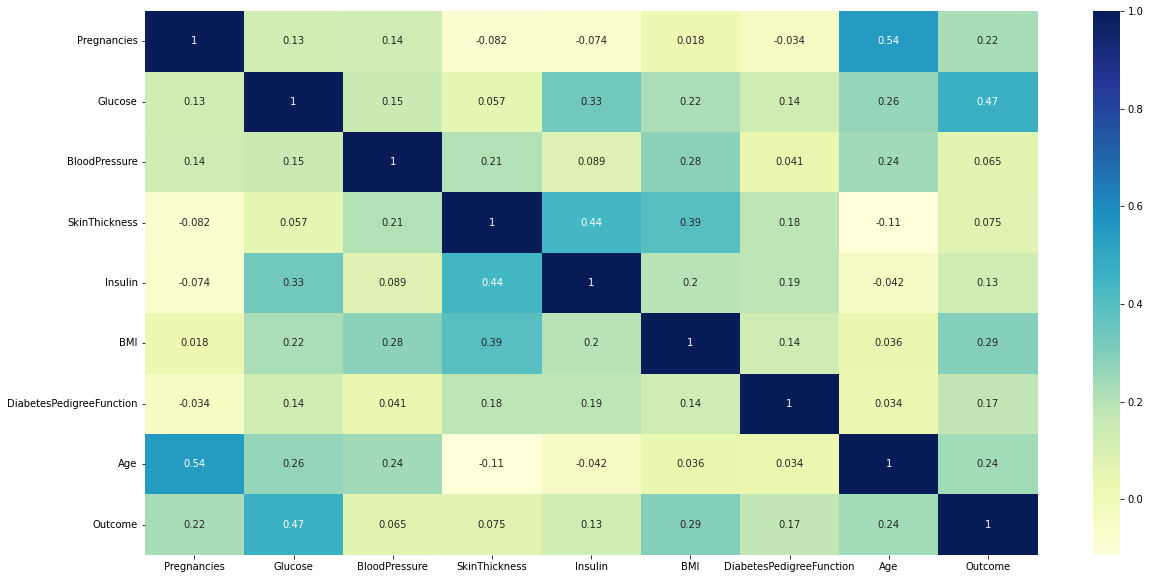

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")


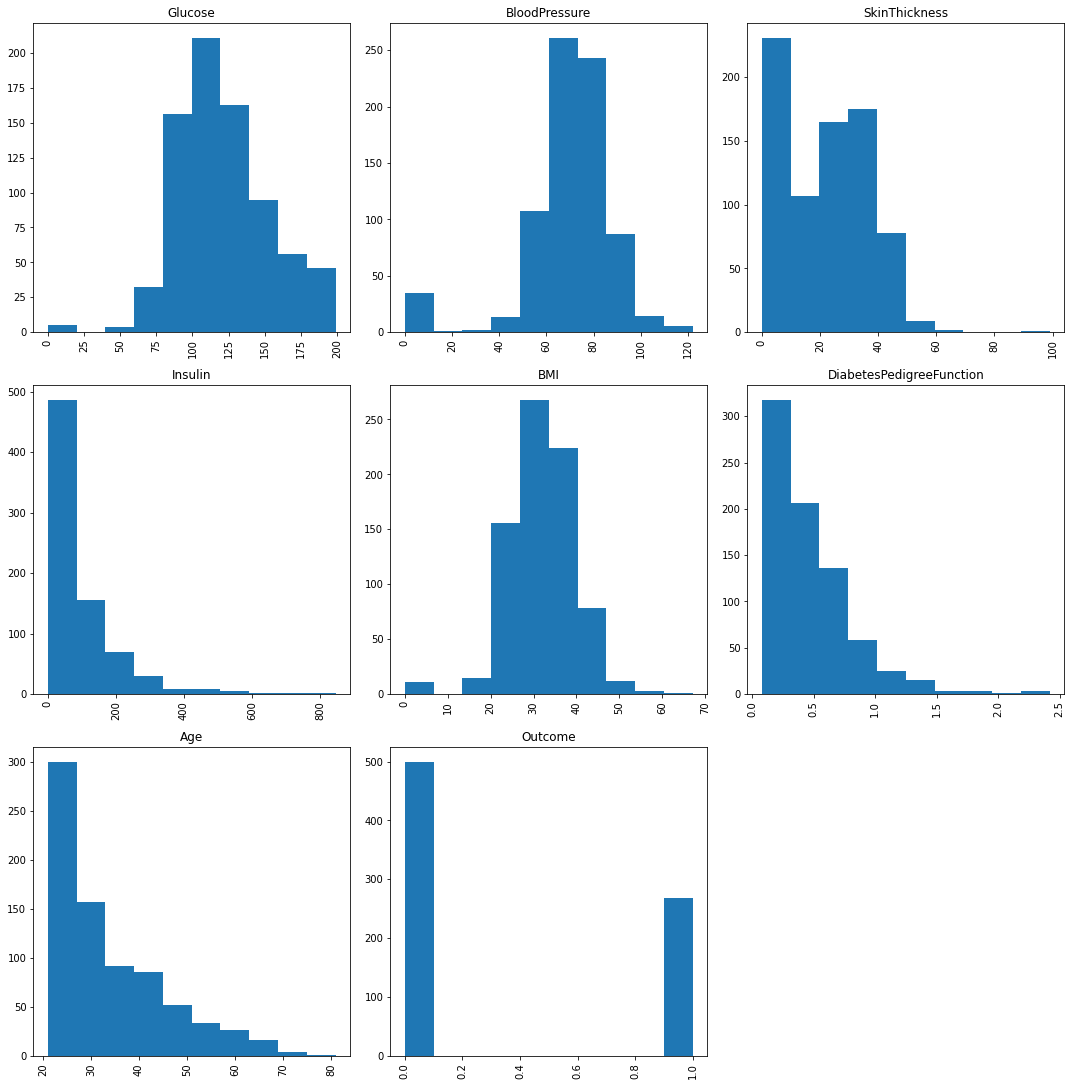

In [ ]:
df_vis=dataset.copy()
cols = list(df_vis.columns)
cols_df=cols[1:]
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

In [ ]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin','DiabetesPedigreeFunction']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [ ]:
# split dataset
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

614
614
154
154


In [ ]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [ ]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[94 13]
 [15 32]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182
